#### **This script has the following procedures:**
- 1 Importing libraries and data
- 2 Data cleaning
- 3 Data preparation for Regression Analysis
- 4 Regression analysis

### **1 Importing libraries and data**

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
# Define path
path = '/Users/elizabetenakamura/Documents/projects/python/data/prepared/'

In [105]:
# Import the insurance data cleaned
df= pd.read_csv(os.path.join(path, 'df_cleaned.csv'))

### **2 Data cleaning**

In [106]:
# Inspecting the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None


In [107]:
print(df.describe())

        Unnamed: 0          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


In [108]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
dtype: object

In [109]:
# Checking for null values
print(df.isnull().sum())

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [110]:
# Checking for duplicates
duplicates = df[df.duplicated()]

In [111]:
# Drop unnamed column
df.drop(columns=['Unnamed: 0'])

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### **3 Data preparation for Regression Analysis**

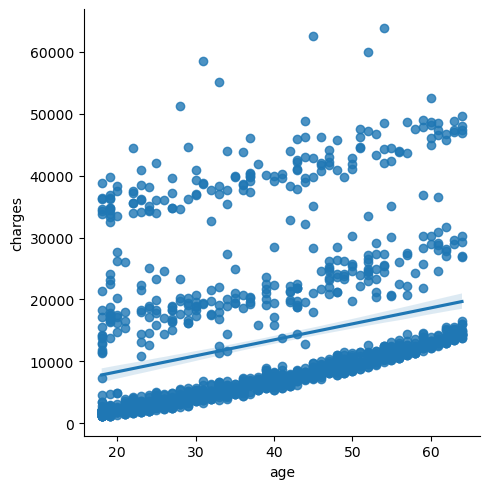

In [112]:
# Scatterplot
scat1 = sns.lmplot(x = 'age', y = 'charges', data = df)

/var/folders/gq/_hkfks214y925nq_01dxwdmm0000gn/T/ipykernel_4067/700576968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[ 'charges'], bins=25)


<Axes: xlabel='charges', ylabel='Density'>

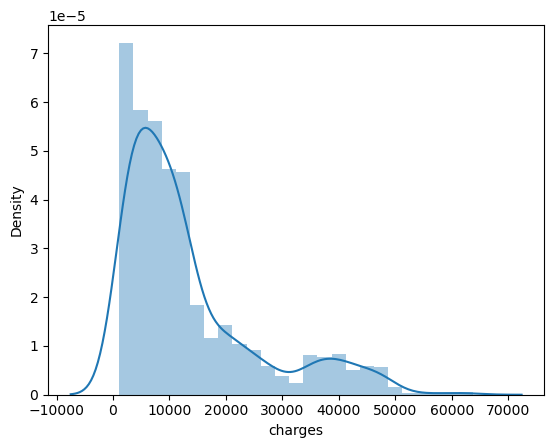

In [113]:
# Showing extreme values
sns.distplot(df[ 'charges'], bins=25)

In [114]:
# Checking how many extreme values
df[df['charges'] > 60000]

Unnamed: 0  age     sex     bmi  children smoker     region      charges
543          543   54  female  47.410         0    yes  southeast  63770.42801
1230        1230   52    male  34.485         3    yes  northwest  60021.39897
1300        1300   45    male  30.360         0    yes  southeast  62592.87309

In [115]:
# Clean extreme values
df = df[df['charges'] < 60000] 

In [116]:
df

Unnamed: 0  age     sex     bmi  children smoker     region      charges
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1335 rows x 8 columns]

#### **Hypotheses**
- Age and Medical Charges: Older individuals are associated with higher medical charges, indicating age as a significant predictor of healthcare costs.
- Answer: Age is a significant predictor of medical charges, as older individuals typically incur higher healthcare costs. This correlation arises from increased healthcare needs, the prevalence of chronic conditions, and more frequent medical interventions among aging populations. Understanding this relationship is crucial for an effective healthcare planning and resource allocation.

- Smoking and Regional Impact: Smoking prevalence varies by region and correlates with increased medical charges, suggesting regional patterns in health-related expenses.
- Answer: Smoking prevalence varies significantly across regions and is linked to increased medical charges due to its association with numerous health complications. This correlation suggests that regional smoking patterns influence healthcare expenses, underscoring the need for targeted public health interventions to reduce smoking rates and manage related costs.

- BMI and Costs: Higher BMI is linked to elevated medical charges, with a potential optimal BMI range associated with lower healthcare costs.
- Answer: Body Mass Index (BMI) is closely linked to healthcare costs, with higher BMI levels associated with increased medical expenses due to obesity-related health conditions. Conversely, an optimal BMI range may correspond to lower healthcare costs, highlighting the potential benefits of maintaining a healthy weight for both individuals and healthcare systems.

In [117]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X_1 = df['charges'].values.reshape(-1,1)
y_1 = df['age'].values.reshape(-1,1)

In [118]:
# Spliting data into a training set and a test set
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

### **4 Regression Analysis**

In [119]:
# Creating a regression object
regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [120]:
# Fit the regression object onto the training set
regression_1.fit(X_1_train, y_1_train)

LinearRegression()

In [121]:
# Predict the values of y using X
y_1_predicted = regression_1.predict(X_1_test)

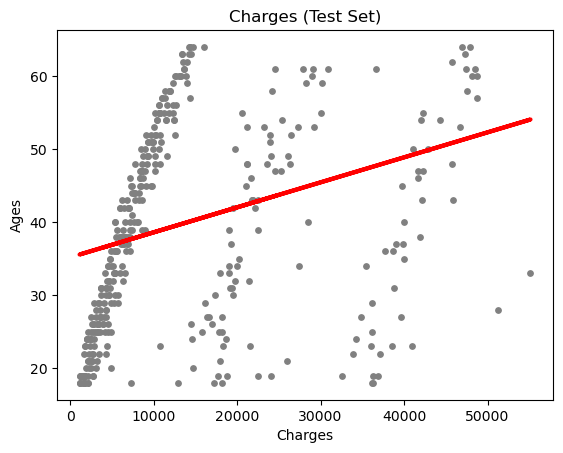

In [122]:
# Create the plot in the desired format
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s=15)  # Scatter plot for the test set
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_1.title('Charges (Test Set)')
plot_test_1.xlabel('Charges')
plot_test_1.ylabel('Ages')

# Show the plot
plot_test_1.show()

#### The regression line illustrates a linear relationship, where as the age of the insured individual increases, so do the charges.It represents an increasing trend. ####

In [123]:
# Printing the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.00034238]]
Mean squared error:  169.92688195697207
R2 score:  0.10211660735975059


In [125]:
# Create a dataframe comparing the actual and predicted values of y.
data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data_1.head(30)

Actual  Predicted
0       26  36.554657
1       45  37.704088
2       56  38.818997
3       63  51.385757
4       34  36.730099
5       32  37.358029
6       31  36.477062
7       24  36.038706
8       33  37.022402
9       55  49.673294
10      24  35.864765
11      42  41.871037
12      20  36.031427
13      18  35.943692
14      43  42.643383
15      21  35.909320
16      42  37.236616
17      34  41.685107
18      23  49.194132
19      48  43.258619
20      24  46.917241
21      23  42.583137
22      22  36.660229
23      31  36.475463
24      29  36.170913
25      55  42.252704
26      18  35.941884
27      19  35.914202
28      37  48.558358
29      29  36.869130

#### **Comparing how the regression fits the training set.**

In [131]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X_2 = df['charges'].values.reshape(-1,1)
y_2 = df['age'].values.reshape(-1,1)

In [132]:
# Spliting data into a training set and a test set
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [133]:
# Creating a regression object
regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [134]:
# Fit the regression object onto the training set
regression_2.fit(X_2_train, y_2_train)

LinearRegression()

In [139]:
# Predict the values of y using X
y_2_predicted = regression_2.predict(X_2_test)

ValueError: x and y must have same first dimension, but have shapes (1335, 1) and (401, 1)

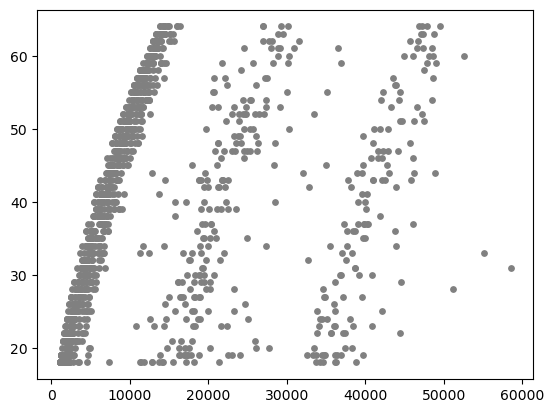

In [140]:
# Create the Plot
plot_test_2 = plt
plot_test_2.scatter(X_2, y_2, color='gray', s=15)  # Scatter plot for the test set
plot_test_2.plot(X_2, y_2_predicted, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_2.title('Charges (Test Set)')
plot_test_2.xlabel('Charges')
plot_test_2.ylabel('Age')

# Show the plot
plot_test_2.show()

In [142]:
# Creating objects that contain the model summary statistics
rmse_2 = mean_squared_error(y_2_test, y_2_predicted) # This is the mean squared error
r2_2 = r2_score(y_2_test, y_2_predicted) # This is the R2 score.

In [143]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.00034238]]
Mean squared error:  169.92688195697207
R2 score:  0.10211660735975059


In [144]:
# Create a dataframe comparing the actual and predicted values of y.
data_2 = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data_2.head(30)

Actual  Predicted
0       26  36.554657
1       45  37.704088
2       56  38.818997
3       63  51.385757
4       34  36.730099
5       32  37.358029
6       31  36.477062
7       24  36.038706
8       33  37.022402
9       55  49.673294
10      24  35.864765
11      42  41.871037
12      20  36.031427
13      18  35.943692
14      43  42.643383
15      21  35.909320
16      42  37.236616
17      34  41.685107
18      23  49.194132
19      48  43.258619
20      24  46.917241
21      23  42.583137
22      22  36.660229
23      31  36.475463
24      29  36.170913
25      55  42.252704
26      18  35.941884
27      19  35.914202
28      37  48.558358
29      29  36.869130